# 14. 이미지 변형(이진화)

- 이진화란? 이미지의 픽셀값을 0또는 255(1, 흰색)로 만드는 연산.
- 목적: 배경과 객체를 구분하거나 관심영역과 비관심영역을 구분하기 위해

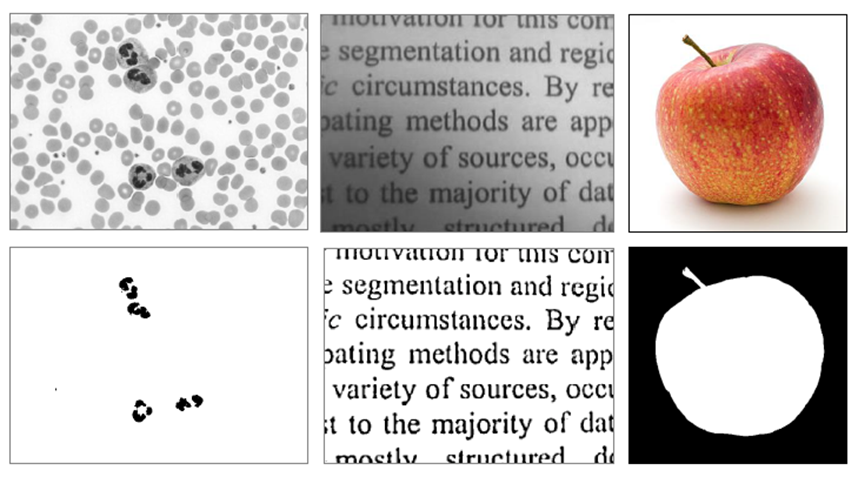

In [3]:
#그레이스케일 되지 않은 이미지의 차원 보기
import cv2
import numpy as np

book_img = cv2.imread('book.jpg')
np.shape(book_img)


(853, 640, 3)

In [5]:
#그레이스케일 된 이미지의 차원보기
import cv2
import numpy as np

book_img = cv2.imread('book.jpg', cv2.IMREAD_GRAYSCALE)
np.shape(book_img)

#결과를 보면 3채널->2채널로 변경된 모습을 볼 수 있다. 

(853, 640)

### 그레이스케일

In [8]:
import cv2

book_img_origin = cv2.imread('book.jpg') #원본 이미지
book_img_gray = cv2.imread('book.jpg', cv2.IMREAD_GRAYSCALE) #그레이스케일 이미지
ret, binary=cv2.threshold(book_img, 127, 255, cv2.THRESH_BINARY) #이진화된 이미지

cv2.imshow('origin img', book_img_origin)
cv2.imshow('gray img', book_img_gray) 
cv2.imshow('binarization', binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
#원본 이미지 출력해보기
print(book_img_origin)

[[[250 248 248]
  [245 243 243]
  [239 239 239]
  ...
  [232 235 240]
  [236 239 244]
  [236 239 244]]

 [[240 238 238]
  [239 237 237]
  [236 236 236]
  ...
  [234 237 242]
  [236 239 244]
  [235 238 243]]

 [[237 237 237]
  [238 238 238]
  [238 238 238]
  ...
  [232 235 240]
  [233 236 241]
  [230 233 238]]

 ...

 [[226 226 226]
  [222 222 222]
  [224 224 224]
  ...
  [214 210 205]
  [216 212 207]
  [223 219 214]]

 [[227 227 227]
  [221 221 221]
  [223 223 223]
  ...
  [213 209 204]
  [216 212 207]
  [221 217 212]]

 [[226 226 226]
  [223 223 223]
  [225 225 225]
  ...
  [212 208 203]
  [215 211 206]
  [218 214 209]]]


In [11]:
#그레이스케일된 이미지 출려개보기
print(book_img_gray)

[[248 243 239 ... 236 240 240]
 [238 237 236 ... 238 240 239]
 [237 238 238 ... 236 237 234]
 ...
 [226 222 224 ... 209 211 218]
 [227 221 223 ... 208 211 216]
 [226 223 225 ... 207 210 213]]


In [10]:
#이진화된 이미지 출력해보기 -> 임계값 127을 넘었기 때문에 전부 최대값인 255로 바뀐 모습
print(binary)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


## Trackbar(값 변화에 따른 변형 확인)

In [3]:
import cv2

# 콜백함수 - 트랙바의 현재 값을 인자로 받아 사용자 정의 작업을 수행함.
def empty(pos):
    print(pos)
    pass

#그레이스케일된이미지 만들기
book_img = cv2.imread('book.jpg', cv2.IMREAD_GRAYSCALE)

# 트랙바에 대한 부분
name="Trackbar" #트랙바 이름
cv2.namedWindow(name) #트랙바 윈도우 생성
cv2.createTrackbar('threshold', name, 127, 255, empty) #임계값에 thresh넣기
#트랙바 이름, 윈도우 이름, 초기값, 트랙바의 최대값(범위는 0부터 최대값까지), 트랙바의 값이 변경될 때 호출되는 콜백 함수

# 트랙바가 변할때마다 이미지가 바뀌도록 해주는 while문
while True:
    thresh = cv2.getTrackbarPos('threshold', name) #트랙바의 현재 값을 반환
    ret, binary = cv2.threshold(book_img, thresh, 255, cv2.THRESH_BINARY) 
    
    #return값이 없으면? 반복문 탈출해주기
    if not ret:
        break
        
    #return값이 있으면? 실행
    cv2.imshow(name, binary)
    
    # 사용자가 'q'키를 누르면 종료
    if cv2.waitKey(1) == ord('q'):
        break
        
cv2.destroyAllWindows()#반복문 탈출하고 모든 창닫기

127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
171
172
173
174
175
176
177
178
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
241
240
239
238
237
236
235
234
233
232
231
230
229
228
227
226
225
224
223
222
221
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
237
236
235
234
233
232
231
230
229
228
226
225
224
223
222
221
220
219
218
216
215
214
213
212
210
209
208
207
205
203
202
201
200
197
196
194
193
191
190
187
186
184
183
180
178
176
174
172
171
168
167
164
163
160
159
157
155
153
151
148
147
145
143
140
139
136
135
132
130
128
126
124
121
118
117
114
112
110
108
106
104
101
100
97
93
91
89
88
86
84
82
81
79
78
76
75
73
72
70
68
6

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2576: error: (-27:Null pointer) NULL window: 'Trackbar' in function 'cvGetTrackbarPos'


## 다른 이미지로 임계값 확인하기

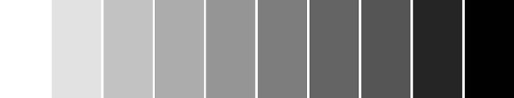

In [1]:
import cv2

# 콜백함수 - 트랙바의 현재 값을 인자로 받아 사용자 정의 작업을 수행함.
def empty(pos):
    print(pos)
    pass

#그레이스케일된이미지 만들기
img = cv2.imread('gray_black.png', cv2.IMREAD_GRAYSCALE)

# 트랙바에 대한 부분
name="Trackbar" #트랙바 이름
cv2.namedWindow(name) #트랙바 윈도우 생성
cv2.createTrackbar('threshold', name, 127, 255, empty) #임계값에 thresh넣기
#트랙바 이름, 윈도우 이름, 초기값, 트랙바의 최대값(범위는 0부터 최대값까지), 트랙바의 값이 변경될 때 호출되는 콜백 함수

# 트랙바가 변할때마다 이미지가 바뀌도록 해주는 while문
while True:
    thresh = cv2.getTrackbarPos('threshold', name) #트랙바의 현재 값을 반환
    ret, binary = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY) 
    
    #return값이 없으면? 반복문 탈출해주기
    if not ret:
        break
        
    #return값이 있으면? 실행
    cv2.imshow(name, binary) # <- 이진화된 이미지
    cv2.imshow('origin img', img)
    
    # 사용자가 'q'키를 누르면 종료
    if cv2.waitKey(1) == ord('q'):
        break
        
cv2.destroyAllWindows()#반복문 탈출하고 모든 창닫기

127
128
129
131
133
134
135
136
137
138
139
141
142
143
144
145
146
147
149
150
151
152
154
156
157
159
160
162
163
164
165
166
167
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
203
204
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
255
254
253
252
251
249
248
247
246
245
244
243
242
241
240
239
238
237
236
235
234
233
232
231
232
233
234
235
236
235
234
231
229
228
225
223
222
221
220
219
216
215
214
212
211
210
209
208
207
206
205
203
202
200
199
198
197
196
194
192
191
190
189
188
187
186
185
184
182
180
179
178
177
176
175
174
173
171
169
167
166
165
164
163
162
161
160
159
158
157
156
154
151
149
147
146
145
144
143
142
141
140
139
138
137
136
134
131
128
127
124
123
122
119
114
113
109
108
107
104
103
102
98
97
96
93
92
89
88
84
81
80
78
77
75
74
72
71
69
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
44
45
46
48
49
51
53
54
55
56


## Adaptive Threshold: 조명변화를 고려한 임계값 적용

- 영역을 세분화해서 임계치를 적용하는 것임.
- 즉, 이미지를 작은 영역으로 나누어서 임계치를 적용함.

- 원본 이미지

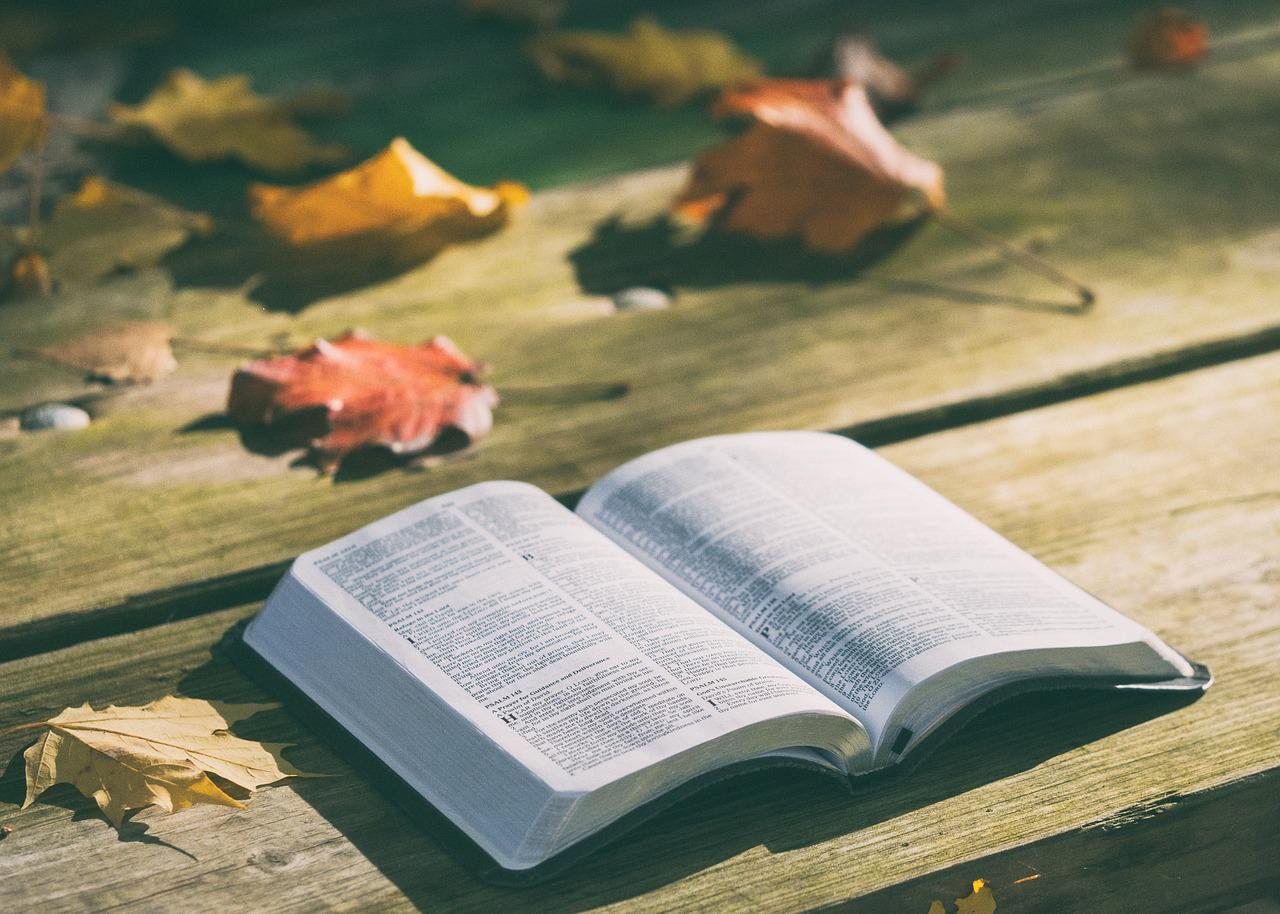

- 이미지를 이진화 했더니 햇빛이 있는 부분과 그림자가 있는 부분은 보이지 않음.
- 그래서 선택적으로 영역을 세분화해서 객체를 따는거임.
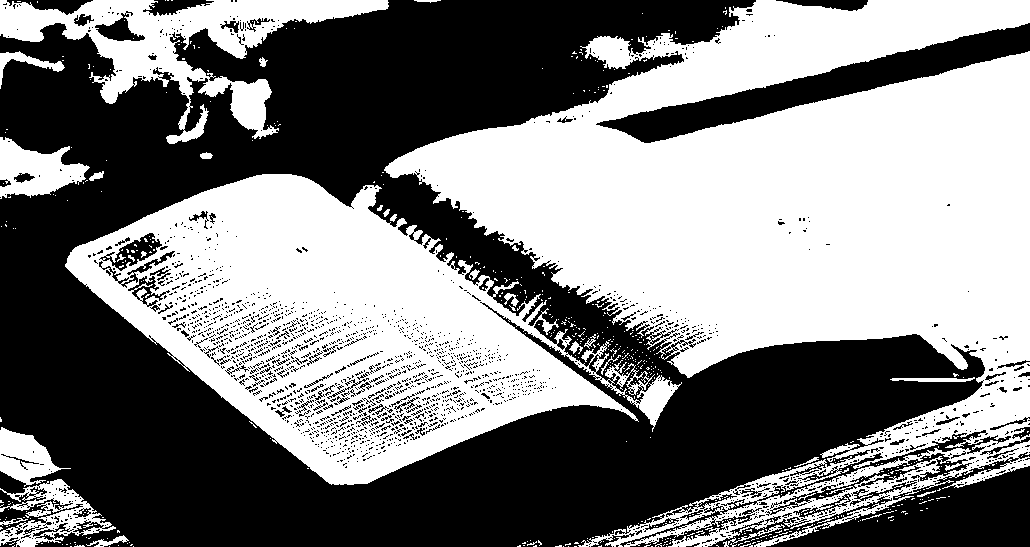

- 영상의 조명이 일정하지 않거나 배경색이 여러가지인 경우에는 하나의 고정된 threshold로는 좋은 결과를 얻지 못한다. 그래서 이미지를 여러 영역으로 나눈 후에 그 주변 픽셀 값을 기준으로 계산하여 영역마다의 threshold를 지정한다. 

In [2]:
import cv2

# 콜백함수 - 트랙바의 현재 값을 인자로 받아 사용자 정의 작업을 수행함.
def empty(pos):
    print(pos)
    pass

#그레이스케일된이미지 만들기
book_adp_img = cv2.imread('book_adp.jpg', cv2.IMREAD_GRAYSCALE)

# 트랙바에 대한 부분
name="Trackbar" #트랙바 이름
cv2.namedWindow(name) #트랙바 윈도우 생성

# 두 가지 옵션중에 1. block_size 사용
cv2.createTrackbar('bolck_size', name, 25, 100, empty) #block_size는 홀수만 가능하고 1보다는 큰 값이여아한다. 
cv2.createTrackbar('c', name, 3, 10, empty) #상수 c는 양수만 쓴다고 가정


# 트랙바가 변할때마다 이미지가 바뀌도록 해주는 while문
while True:
    block_size = cv2.getTrackbarPos('bolck_size', name) #트랙바의 현재 값을 반환
    c = cv2.getTrackbarPos('c', name)
    
    # block_size는 1보다 커야하기 때문에 넣어준 if문
    if block_size <= 1:
        block_size == 3 #1보다 큰 홀수는 3이기 때문에
        
    # block_size는 짝수만 가능하기 때문에 넣어준 if문
    if block_size %2 == 0:
        block_size += 1 #만약 짝수라면 1더해서 홀수로 만들어주기
        
    # adaptiveThreshold는 전달받는 값이 1개임
    binary = cv2.adaptiveThreshold(book_adp_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c)

    #return값이 있으면? 실행
    cv2.imshow(name, binary)
    
    # 사용자가 'q'키를 누르면 종료
    if cv2.waitKey(1) == ord('q'):
        break
        
cv2.destroyAllWindows()#반복문 탈출하고 모든 창닫기

25
3
2
1
2
3
4
5
6
7
8
9
8
7
6
5
4
3
2
1
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
88
87
86
85
84
83
82
81
80
79
77
75
74
72
69
68
67
66
65
63
62
61
59
57
56
55
54
53
52
51
50
49
47
46
45
44
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
5
6
7
8


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2576: error: (-27:Null pointer) NULL window: 'Trackbar' in function 'cvGetTrackbarPos'


## 오츠 알고리즘: 적절한 임계값을 찾아줌

- 오츠 알고리즘을 통해 자동으로 임계값을 찾아주는 것

In [ ]:
import cv2
img = cv2.imread('book_adp.jpg', cv2.IMREAD_GRAYSCALE)

ret, binary= cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) #이진화된 이미지
ret, otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) #오츠알고리즘을 통해 임계값을 자동으로 찾아주니까 -1써주기
print('otsu threshold', ret)#오츠가 찾은 최적의 임계치 확인해보기 

cv2.imshow('img', img)#원본이미지
cv2.imshow('binary', binary)#바이너리 이미지
cv2.imshow('otsu', otsu)#원본이미지

cv2.waitKey(0)
cv2.destroyAllWindows()